In [719]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

Load the dataset as a pandas dataframe
https://www.kaggle.com/datasets/mylesoneill/magic-the-gathering-cards?resource=download

In [720]:
cards_df = pd.read_json('/content/AllCards.json')

In [721]:
cards = cards_df.transpose()

In [722]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20478 entries, "Ach! Hans, Run!" to capital offense
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   colorIdentity          20478 non-null  object
 1   colors                 20478 non-null  object
 2   convertedManaCost      20478 non-null  object
 3   foreignData            20478 non-null  object
 4   layout                 20478 non-null  object
 5   legalities             20478 non-null  object
 6   manaCost               19270 non-null  object
 7   name                   20478 non-null  object
 8   printings              20478 non-null  object
 9   purchaseUrls           18423 non-null  object
 10  rulings                20478 non-null  object
 11  scryfallOracleId       20478 non-null  object
 12  subtypes               20478 non-null  object
 13  supertypes             20478 non-null  object
 14  text                   20151 non-null  object
 15

In [723]:
cards.head()

,colorIdentity,colors,convertedManaCost,foreignData,layout,legalities,manaCost,name,printings,purchaseUrls,...,faceConvertedManaCost,names,side,isReserved,leadershipSkills,loyalty,hand,life,colorIndicator,hasNoDeckLimit
"""Ach! Hans, Run!""","[G, R]","[G, R]",6.0,[],normal,{},{2}{R}{R}{G}{G},"""Ach! Hans, Run!""",[UNH],{'cardmarket': 'https://mtgjson.com/links/6227...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Rumors of My Death . . .""",[B],[B],3.0,[],normal,{},{2}{B},"""Rumors of My Death . . .""",[UST],{'cardmarket': 'https://mtgjson.com/links/371e...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996 World Champion,"[B, G, R, U, W]","[B, G, R, U, W]",5.0,[],normal,{},{W}{U}{B}{R}{G},1996 World Champion,[PCEL],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Display of My Dark Power,[],[],0.0,[],scheme,{},NaN,A Display of My Dark Power,[OARC],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Good Thing,"[B, W]","[B, W]",6.0,[],normal,{},{4}{W}{B},A Good Thing,[MYSTPT],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


making the CMC columns a float data type

In [724]:
cards[["convertedManaCost"]] = cards[["convertedManaCost"]].astype(int)

In [725]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20478 entries, "Ach! Hans, Run!" to capital offense
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   colorIdentity          20478 non-null  object
 1   colors                 20478 non-null  object
 2   convertedManaCost      20478 non-null  int64 
 3   foreignData            20478 non-null  object
 4   layout                 20478 non-null  object
 5   legalities             20478 non-null  object
 6   manaCost               19270 non-null  object
 7   name                   20478 non-null  object
 8   printings              20478 non-null  object
 9   purchaseUrls           18423 non-null  object
 10  rulings                20478 non-null  object
 11  scryfallOracleId       20478 non-null  object
 12  subtypes               20478 non-null  object
 13  supertypes             20478 non-null  object
 14  text                   20151 non-null  object
 15

plotting a histogram of the different layout types within the dataset

(array([1.9716e+04, 2.1200e+02, 8.6000e+01, 6.1000e+01, 1.0700e+02,
        1.2600e+02, 1.0900e+02, 2.5000e+01, 9.0000e+00, 2.7000e+01]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

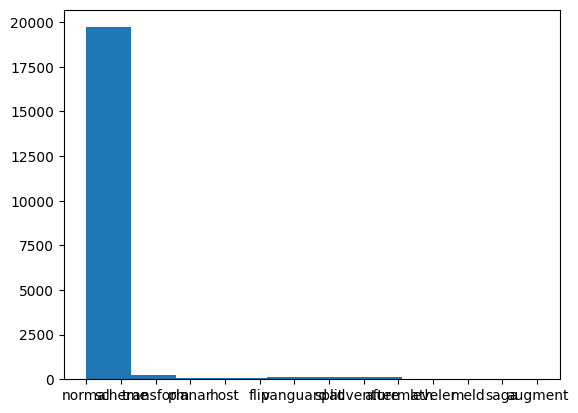

In [726]:
plt.hist(cards['layout'])

dropping the following columns because they are either redunant or don't hold relevant card information

In [727]:
toDrop = {'subtypes', 'manaCost', 'colors', 'hasNoDeckLimit', 'colorIndicator', 'life', 'hand', 'leadershipSkills', 'side', 'names', 'faceConvertedManaCost', 'mtgArenaId', 'mtgoId', 'mtgoFoilId', 'foreignData', 'legalities', 'name', 'printings', 'purchaseUrls', 'rulings', 'scryfallOracleId', 'text', 'type', 'types', 'uuid', 'edhrecRank'}
cards = cards.drop(toDrop, axis=1)

In [728]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20478 entries, "Ach! Hans, Run!" to capital offense
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   colorIdentity      20478 non-null  object
 1   convertedManaCost  20478 non-null  int64 
 2   layout             20478 non-null  object
 3   supertypes         20478 non-null  object
 4   power              10747 non-null  object
 5   toughness          10747 non-null  object
 6   isReserved         571 non-null    object
 7   loyalty            204 non-null    object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


removing null values from the remaining columns

In [729]:
cards['power'].fillna(0, inplace=True)

<ipython-input-729-ff2d4aa74c39>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cards['power'].fillna(0, inplace=True)


In [730]:
cards['toughness'].fillna(0, inplace=True)

<ipython-input-730-87d019a34789>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cards['toughness'].fillna(0, inplace=True)


In [731]:
cards['toughness'].value_counts()

,count
toughness,
0,9731
2,2783
1,2558
3,2152
4,1458
5,769
6,399
0,172
7,160


In [732]:
cards['power'] = cards['power'].replace('*', -1)

In [733]:
cards['toughness'] = cards['toughness'].replace('*', -1)

In [734]:
cards = cards[pd.to_numeric(cards['power'], errors='coerce').notnull()]

In [735]:
cards = cards[pd.to_numeric(cards['toughness'], errors='coerce').notnull()]

In [736]:
cards['power'] = cards['power'].astype(float)
cards['power'] = np.floor(cards['power'])
cards['power'] = cards['power'].astype(int)

In [737]:
cards['toughness'] = cards['toughness'].astype(float)
cards['toughness'] = np.floor(cards['toughness'])
cards['toughness'] = cards['toughness'].astype(int)

In [738]:
cards['isReserved'].value_counts()

,count
isReserved,
True,568


In [739]:
cards['isReserved'].fillna(0, inplace=True)

<ipython-input-739-857656c9fd4d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cards['isReserved'].fillna(0, inplace=True)


In [740]:
cards['isReserved'].value_counts()

,count
isReserved,
0,19894
True,568


In [741]:
cards['isReserved'] = cards['isReserved'].replace(True, 1)

<ipython-input-741-f62befe10e3f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cards['isReserved'] = cards['isReserved'].replace(True, 1)


In [742]:
cards['isReserved'].value_counts()

,count
isReserved,
0,19894
1,568


In [743]:
cards['loyalty'].value_counts()

,count
loyalty,
5,66
4,66
3,47
6,9
7,8
2,4
1d4+1,1
20,1
X,1


In [744]:
cards['loyalty'] = cards['loyalty'].replace('*', -1)
cards['loyalty'] = cards['loyalty'].replace('X', -1)
cards['loyalty'] = cards['loyalty'].replace('1d4+1', 5)

In [745]:
cards['loyalty'].fillna(0, inplace=True)

<ipython-input-745-c1184a0650a9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cards['loyalty'].fillna(0, inplace=True)


In [746]:
cards['loyalty'] = cards['loyalty'].astype(float)
cards['loyalty'] = np.floor(cards['loyalty'])
cards['loyalty'] = cards['loyalty'].astype(int)

In [747]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20462 entries, "Ach! Hans, Run!" to capital offense
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   colorIdentity      20462 non-null  object
 1   convertedManaCost  20462 non-null  int64 
 2   layout             20462 non-null  object
 3   supertypes         20462 non-null  object
 4   power              20462 non-null  int64 
 5   toughness          20462 non-null  int64 
 6   isReserved         20462 non-null  int64 
 7   loyalty            20462 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.4+ MB


In [748]:
cards['colorIdentity'] = cards['colorIdentity'].apply(lambda x: ', '.join(x))

In [749]:
cards['colorIdentity'] = cards['colorIdentity'].replace('', 'C')

In [750]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [751]:
encoder = LabelEncoder()
encoder.fit(cards['colorIdentity'])
cards['colorIdentity'] = encoder.transform(cards['colorIdentity'])

In [752]:
encoder = LabelEncoder()
encoder.fit(cards['layout'])
cards['layout'] = encoder.transform(cards['layout'])

In [753]:
cards['supertypes'] = cards['supertypes'].apply(lambda x: ', '.join(x))

In [754]:
cards['colorIdentity'] = cards['colorIdentity'].replace('', 'Typeless')

In [755]:
encoder = LabelEncoder()
encoder.fit(cards['supertypes'])
cards['supertypes'] = encoder.transform(cards['supertypes'])

In [756]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20462 entries, "Ach! Hans, Run!" to capital offense
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   colorIdentity      20462 non-null  int64
 1   convertedManaCost  20462 non-null  int64
 2   layout             20462 non-null  int64
 3   supertypes         20462 non-null  int64
 4   power              20462 non-null  int64
 5   toughness          20462 non-null  int64
 6   isReserved         20462 non-null  int64
 7   loyalty            20462 non-null  int64
dtypes: int64(8)
memory usage: 1.9+ MB


Last step normalizing the data so that Classification Naive Bayes and so that all models are trained on the same data.

In [757]:
X= cards.drop('isReserved', axis=1)
y= cards['isReserved']

In [758]:
from sklearn.preprocessing import normalize

X = normalize(X)

# KNN Classifier
guessing which cards are on the reserved list

In [759]:
from sklearn.model_selection import train_test_split

Xtrn, Xtst, ytrn, ytst = train_test_split(X, y, test_size=0.2, random_state=42)

In [760]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
max = 0
neighbors = 0
for i in range(1,15):
  model = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
  model.fit(Xtrn, ytrn)

  yprd = model.predict(Xtst)
  accuracy = accuracy_score(ytst, yprd)

  if accuracy > max:
    max = accuracy
    neighbors = i

print("neighbors: " + str(neighbors))
print("best accuracy: " + str(max))

neighbors: 2
best accuracy: 0.9701930124602981


<Axes: >

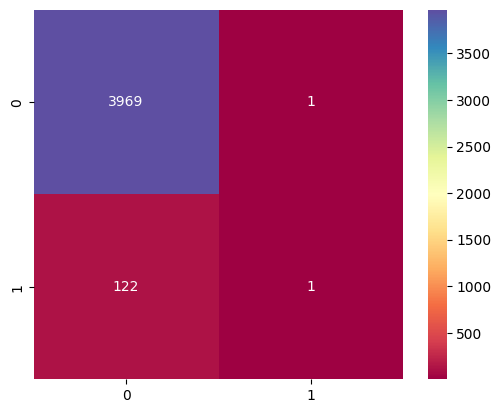

In [761]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytst, yprd)

import seaborn as sns
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                    cmap="Spectral",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

In [762]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
max = 0
neighbors = 0
for i in range(1,15):
  model = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
  model.fit(Xtrn, ytrn)

  yprd = model.predict(Xtst)
  accuracy = accuracy_score(ytst, yprd)

  if accuracy > max:
    max = accuracy
    neighbors = i

print("neighbors: " + str(neighbors))
print("best accuracy: " + str(max))

neighbors: 4
best accuracy: 0.9701930124602981


<Axes: >

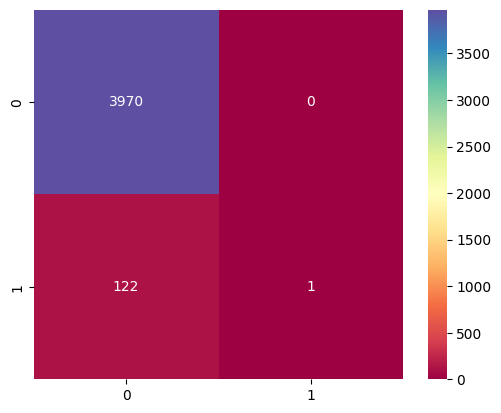

In [763]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytst, yprd)

import seaborn as sns
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                    cmap="Spectral",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

# Naive Bayes
Guessing if a card is on the reserved list

In [764]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score

# 1 needs to be addded to remove negative values
cXtrn = Xtrn + 1
cXtst = Xtst + 1

model = ComplementNB()
model.fit(cXtrn, ytrn)

yprd = model.predict(cXtst)
accuracy = accuracy_score(ytst, yprd)

print("accuracy: " + str(accuracy))

accuracy: 0.38602492059613974


<Axes: >

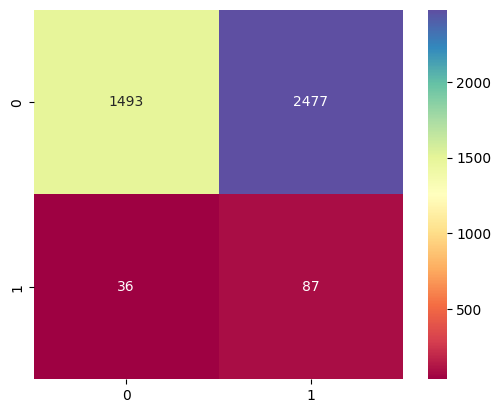

In [765]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytst, yprd)

import seaborn as sns
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                    cmap="Spectral",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

In [766]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score

model = CategoricalNB()
model.fit(Xtrn, ytrn)

yprd = model.predict(Xtst)
accuracy = accuracy_score(ytst, yprd)

print("accuracy: " + str(accuracy))

accuracy: 0.9699486928903005


<Axes: >

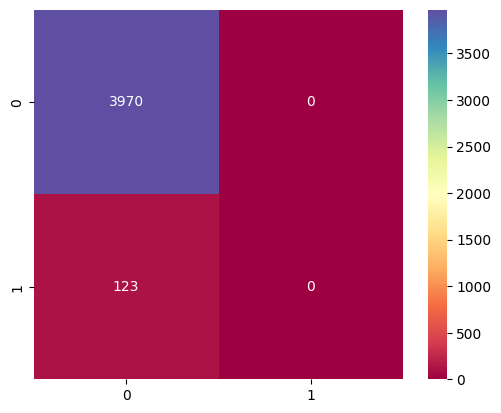

In [767]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytst, yprd)

import seaborn as sns
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                    cmap="Spectral",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)